Kami dari kelompok 2 PYTN-KS18 yang beranggotakan :
* Annisa Aprilia
* Rika Anggraini
* Rendhi Andrianto

## 1. Introduce



kami akan menganalisis data ini guna memenuhi tugas Final Project 1. Data ini merupakan kumpulan data mengenai penggunaan transportasi antara Uber dan Lyft Boston di Amerika/New York, attribut dari data ini anatar lain  weather, hour,   temperature, sunset, dan sebagainya. Pada data ini kita ingin mengprediksi harga dari penggunaan transportasi Uber dan Lyft dengan menggunakan pemodelan Linear Regression

## 2. Import Pustaka Yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats
from statsmodels.stats.diagnostic import normal_ad
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

## 3. Data Loading

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df

id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7 1544952607.89     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d 1543284023.68     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e 1543366822.20     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512 1543553582.75     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a 1543463360.22     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842 1543708386.00    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341 1543708386.00    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f 1543708386.00    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e 1543708386.00    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda 1543708386.00    23    1     12   

                   datetime          timezone            source  \
0       2018-12-16 09:30:07  America/New_York  Haymarket Square   
1       2018-11-27 02:00:23  America/New_York  Haymarket Square   
2       2018-11-28 01:00:22  America/New_York  Haymarket Square   
3       2018-11-30 04:53:02  America/New_York  Haymarket Square   
4       2018-11-29 03:49:20  America/New_York  Haymarket Square   
...                     ...               ...               ...   
693066  2018-12-01 23:53:05  America/New_York          West End   
693067  2018-12-01 23:53:05  America/New_York          West End   
693068  2018-12-01 23:53:05  America/New_York          West End   
693069  2018-12-01 23:53:05  America/New_York          West End   
693070  2018-12-01 23:53:05  America/New_York          West End   

          destination cab_type                            product_id  \
0       North Station     Lyft                             lyft_line   
1       North Station     Lyft                          lyft_premier   
2       North Station     Lyft                                  lyft   
3       North Station     Lyft                           lyft_luxsuv   
4       North Station     Lyft                             lyft_plus   
...               ...      ...                                   ...   
693066      North End     Uber  6f72dfc5-27f1-42e8-84db-ccc7a75f6969   
693067      North End     Uber  55c66225-fbe7-4fd5-9072-eab1ece5e23e   
693068      North End     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a   
693069      North End     Uber  6d318bcc-22a3-4af6-bddd-b409bfce1546   
693070      North End     Uber  997acbb5-e102-41e1-b155-9df7de0a73f2   

                name  price  distance  surge_multiplier  latitude  longitude  \
0             Shared   5.00      0.44              1.00     42.21     -71.03   
1                Lux  11.00      0.44              1.00     42.21     -71.03   
2               Lyft   7.00      0.44              1.00     42.21     -71.03   
3       Lux Black XL  26.00      0.44              1.00     42.21     -71.03   
4            Lyft XL   9.00      0.44              1.00     42.21     -71.03   
...              ...    ...       ...               ...       ...        ...   
693066        UberXL  13.00      1.00              1.00     42.35     -71.06   
693067         UberX   9.50      1.00              1.00     42.35     -71.06   
693068          Taxi    NaN      1.00              1.00     42.35     -71.06   
693069     Black SUV  27.00      1.00              1.00     42.35     -71.06   
693070      UberPool  10.00      1.00              1.00     42.35     -71.06   

        temperature  apparentTemperature    short_summary  \
0             42.34                37.12   Mostly Cloudy    
1             43.58                37.35            Rain    
2             38.33                32.93           Clear    
3             34.38                29.63           Clear    
4             37.44                30.88   Partly Cloudy    
...             ...                  ...              ...   
693066        37.05    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
df.describe().T

count          mean       std           min  \
timestamp                   693071.00 1544045709.76 689192.49 1543203646.00   
hour                        693071.00         11.62      6.95          0.00   
day                         693071.00         17.79      9.98          1.00   
month                       693071.00         11.59      0.49         11.00   
price                       637976.00         16.55      9.32          2.50   
distance                    693071.00          2.19      1.14          0.02   
surge_multiplier            693071.00          1.01      0.09          1.00   
latitude                    693071.00         42.34      0.05         42.21   
longitude                   693071.00        -71.07      0.02        -71.11   
temperature                 693071.00         39.58      6.73         18.91   
apparentTemperature         693071.00         35.88      7.92         12.13   
precipIntensity             693071.00          0.01      0.03          0.00   
precipProbability           693071.00          0.15      0.33          0.00   
humidity                    693071.00          0.74      0.14          0.38   
windSpeed                   693071.00          6.19      3.15          0.45   
windGust                    693071.00          8.47      5.29          0.80   
windGustTime                693071.00 1544048883.54 692824.40 1543150800.00   
visibility                  693071.00          8.47      2.60          0.72   
temperatureHigh             693071.00         45.04      6.00         32.68   
temperatureHighTime         693071.00 1544049894.63 693792.11 1543154400.00   
temperatureLow              693071.00         34.15      6.38         17.85   
temperatureLowTime          693071.00 1544102170.88 692292.33 1543233600.00   
apparentTemperatureHigh     693071.00         41.61      7.67         22.62   
apparentTemperatureHighTime 693071.00 1544050235.26 694169.87 1543186800.00   
apparentTemperatureLow      693071.00         30.14      8.06         11.81   
apparentTemperatureLowTime  693071.00 1544098720.41 692737.83 1543233600.00   
dewPoint                    693071.00         31.66      9.14          4.39   
pressure                    693071.00       1010.09     13.47        988.09   
windBearing                 693071.00        220.06     99.10          2.00   
cloudCover                  693071.00          0.69      0.36          0.00   
uvIndex                     693071.00          0.25      0.47          0.00   
visibility.1                693071.00          8.47      2.60          0.72   
ozone                       693071.00        313.51     27.95        269.40   
sunriseTime                 693071.00 1544027098.20 691139.27 1543146535.00   
sunsetTime                  693071.00 1544060438.64 690663.39 1543180615.00   
moonPhase                   693071.00          0.58      0.24          0.09   
precipIntensityMax          693071.00          0.04      0.06          0.00   
uvIndexTime                 693071.00 1544043966.24 691202.77 1543161600.00   
temperatureMin              693071.00         33.46      6.47         15.63   
temperatureMinTime          693071.00 1544041609.57 690195.44 1543122000.00   
temperatureMax              693071.00         45.26      5.65         33.51   
temperatureMaxTime          693071.00 1544047300.03 690135.34 1543154400.00   
apparentTemperatureMin      693071.00         29.73      7.11         11.81   
apparentTemperatureMinTime  693071.00 1544048034.74 687186.19 1543136400.00   
apparentTemperatureMax      693071.00         42.00      6.94         28.95   
apparentTemperatureMaxTime  693071.00 1544047993.95 691077.65 1543186800.00   

                                      25%           50%           75%  \
timestamp                   1543443968.00 1543737478.00 1544827509.00   
hour                                 6.00         12.00         18.00   
day                                 13.00         17.00         28.00   
month                     

In [5]:
df.describe(include=object).T

count  unique                                   top    freq
id             693071  693071  424553bb-7174-41ea-aeb4-fe06d4f4b9d7       1
datetime       693071   31350                   2018-11-26 23:21:14     156
timezone       693071       1                      America/New_York  693071
source         693071      12                    Financial District   58857
destination    693071      12                    Financial District   58851
cab_type       693071       2                                  Uber  385663
product_id     693071      13  6f72dfc5-27f1-42e8-84db-ccc7a75f6969   55096
name           693071      13                                UberXL   55096
short_summary  693071       9                             Overcast   218895
long_summary   693071      11    Mostly cloudy throughout the day.   202340
icon           693071       7                               cloudy   218895

## Kesimpulan 
Pada tahap loading data kita terlebih dahulu memamnggil data, mencari tahu info dari data, dan mengetahui nilai statistik deskritif dari data tersebut. Untuk syntax df.describe().T berfungsi mengubah/ mengtranspose baris menjadi kolom. 

## 4. Data Cleaning

In [6]:
df = df.drop(columns=['id', 'timezone', 'apparentTemperatureMaxTime', 'apparentTemperatureMinTime', 'temperatureMaxTime', 'temperatureMinTime',
                'uvIndexTime', 'sunsetTime', 'sunriseTime', 'apparentTemperatureLowTime', 'apparentTemperatureHighTime', 'temperatureLowTime',
                'temperatureHighTime', 'windGustTime', 'timestamp','moonPhase'])
df.sample(5)

hour  day  month             datetime                   source  \
156010     6    3     12  2018-12-03 06:43:06              Beacon Hill   
400321     5   30     11  2018-11-30 05:23:03            North Station   
663170    18    1     12  2018-12-01 18:58:03  Northeastern University   
40508      6    4     12  2018-12-04 06:07:58                 West End   
658718     7    2     12  2018-12-02 07:13:03       Financial District   

             destination cab_type                            product_id  \
156010  Haymarket Square     Uber  6d318bcc-22a3-4af6-bddd-b409bfce1546   
400321            Fenway     Uber  55c66225-fbe7-4fd5-9072-eab1ece5e23e   
663170     North Station     Lyft                              lyft_lux   
40508          North End     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a   
658718         North End     Uber  997acbb5-e102-41e1-b155-9df7de0a73f2   

             name  price  distance  surge_multiplier  latitude  longitude  \
156010  Black SUV  27.50      1.35              1.00     42.35     -71.08   
400321      UberX  11.50      3.05              1.00     42.36     -71.06   
663170  Lux Black  26.00      3.30              1.00     42.36     -71.05   
40508        Taxi    NaN      1.23              1.00     42.35     -71.11   
658718   UberPool   7.50      1.21              1.00     42.35     -71.06   

        temperature  apparentTemperature    short_summary  \
156010        45.58                45.58           Foggy    
400321        33.78                29.40           Clear    
663170        43.64                43.64   Partly Cloudy    
40508         40.67                35.61        Overcast    
658718        38.41                38.41        Overcast    

                                      long_summary  precipIntensity  \
156010                      Foggy in the morning.              0.00   
400321          Mostly cloudy throughout the day.              0.00   
663170   Light rain in the morning and overnight.              0.00   
40508           Partly cloudy throughout the day.              0.00   
658718                  Light rain until evening.              0.00   

        precipProbability  humidity  windSpeed  windGust  visibility  \
156010               0.00      0.96       1.25      2.09        1.41   
400321               0.00      0.75       4.74      5.00        9.99   
663170               0.00      0.54       2.73      3.36        9.88   
40508                0.00      0.64       7.59      9.09        9.88   
658718               0.00      0.85       2.67      4.84        9.44   

        temperatureHigh  temperatureLow  apparentTemperatureHigh  \
156010            57.02           33.74                    56.35   
400321            42.64           31.57                    40.61   
663170            44.66           35.04                    43.99   
40508             38.80           19.63                    31.62   
658718            51.12           44.96                    50.45   

        apparentTemperatureLow                 icon  dewPoint  pressure  \
156010                   28.53                 fog      44.50   1001.06   
400321                   27.88         clear-night      26.76   1013.87   
663170                   35.69   partly-cloudy-day      27.90   1022.86   
40508                    15.90              cloudy      29.32   1004.30   
658718                   45.61              cloudy      34.28   1020.69   

        windBearing  cloudCover  uvIndex  visibility.1  ozone  \
156010          307        1.00        0          1.41 290.90   
400321          306        0.00        0          9.99 289.90   
663170          303        0.30        1          9.88 274.80   
40508           317        1.00        0          9.88 343.90   
658718          147        1.00        0          9.44 269.40   

        precipIntensityMax  temperatureMin  temperatureMax  \
156010                0.00           43.09           57.02   
400321                0.00           28.78     

In [7]:
df['icon'].value_counts()

icon
 cloudy                  218895
 partly-cloudy-night     158030
 partly-cloudy-day       115404
 rain                    104556
 clear-night              60294
 clear-day                26832
 fog                       9060
Name: count, dtype: int64

In [8]:
df['long_summary'].nunique()

11

In [9]:
df.groupby(['short_summary', 'long_summary'])['hour'].count()

short_summary       long_summary                                        
 Clear               Foggy in the morning.                                   3744
                     Light rain in the morning and overnight.                3744
                     Light rain in the morning.                              3900
                     Mostly cloudy throughout the day.                      34632
                     Partly cloudy throughout the day.                      37362
                     Rain throughout the day.                                3744
 Drizzle             Light rain in the morning.                              5616
                     Rain until morning, starting again in the evening.      1680
 Foggy               Foggy in the morning.                                   5616
                     Rain in the morning and afternoon.                        84
                     Rain until morning, starting again in the evening.      3360
 Light Rain          Ligh

In [10]:
lst_remove_temp = df.filter(regex='temperature|apparent', axis=1).columns.to_list()
lst_remove_temp.remove('temperature')
lst_remove_temp

['apparentTemperature',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'temperatureMin',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']

In [11]:
df = df.drop(columns=['long_summary', 'icon', 'latitude', 'longitude'])
df = df.drop(columns='datetime')
df = df.drop(columns=lst_remove_temp)

In [12]:
df.sample()

hour  day  month                   source  destination cab_type  \
346558     3   18     12  Northeastern University  Beacon Hill     Uber   

                                  product_id      name  price  distance  \
346558  997acbb5-e102-41e1-b155-9df7de0a73f2  UberPool   9.00      2.61   

        surge_multiplier  temperature short_summary  precipIntensity  \
346558              1.00        37.26     Overcast              0.00   

        precipProbability  humidity  windSpeed  windGust  visibility  \
346558               0.00      0.69       6.67     11.38        9.84   

        dewPoint  pressure  windBearing  cloudCover  uvIndex  visibility.1  \
346558     28.10   1001.11          276        0.95        0          9.84   

        ozone  precipIntensityMax  
346558 365.10                0.02

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                693071 non-null  int64  
 1   day                 693071 non-null  int64  
 2   month               693071 non-null  int64  
 3   source              693071 non-null  object 
 4   destination         693071 non-null  object 
 5   cab_type            693071 non-null  object 
 6   product_id          693071 non-null  object 
 7   name                693071 non-null  object 
 8   price               637976 non-null  float64
 9   distance            693071 non-null  float64
 10  surge_multiplier    693071 non-null  float64
 11  temperature         693071 non-null  float64
 12  short_summary       693071 non-null  object 
 13  precipIntensity     693071 non-null  float64
 14  precipProbability   693071 non-null  float64
 15  humidity            693071 non-nul

## Kesimpulan Data Cleaning 
pada proses data cleaning disini kita menghapus kolom yang tidak dipakai yaitu :
--> [id', 'timezone', 'apparentTemperatureMaxTime', 'apparentTemperatureMinTime', 'temperatureMaxTime', 'temperatureMinTime','uvIndexTime', 'sunsetTime', 'sunriseTime' 'apparentTemperatureLowTime', 'apparentTemperatureHighTime', 'temperatureLowTime','temperatureHighTime', 'windGustTime', 'timestamp', apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','long_summary','icon', 'latitude', dan 'longitude'].

ALASAN : 
* untuk columns temperature hanya menggunakan satu columns temperature saja yaitu columns temperature. kemudian columns temperature lainnya seperti apperenttemperatureMaxTime dan selanjutnya lebih baik untuk didrop karena tidak terlalu diperlukan.
 - untuk columns datetime di drop karena sudah ada columns hour, day, and mounth.
 - untuk  columns latitude, longitude, long_summary, icon, id, dan timezone di drop karena bukan angka sejati dan tidak keterurutan.
 - untuk columns moonphase di drop karena tidak terlalu relevan untuk di analisa.


## 4.1 Outlier

In [14]:
np.mean(df['price'])

16.545125490614065

In [15]:
print('hasil outlier menggunakan z-score yaitu :')
# menghitung outlier menggunkan z-score
cek_outlier = df['price']
# Menghitung z-score untuk setiap nilai

z_scores = np.abs(( cek_outlier- cek_outlier.mean()) / cek_outlier.std())

# Menentukan batas z-score untuk outlier (misalnya, z-score > 8) 
outliers = (z_scores > 8)

# Menampilkan baris yang berisi outlier
print(cek_outlier[outliers])

hasil outlier menggunakan z-score yaitu :
28083    92.00
75919    92.00
271719   92.00
280566   92.00
301021   92.00
440000   92.00
515785   92.00
537453   92.00
560058   92.00
597071   97.50
Name: price, dtype: float64


## Kesimpulan
z-score merupakan salah satu pengujian outlier, nilai z-score yang tinggi menunjukan adanya outlier pada suatu data. pada analisis kali ini kami mencari outlier pada columns price dan hasil nilai outlier > 9.00 adalah outlier dari columns price.

In [16]:
# Menghitung Q1, Q3, dan IQR
# Menghitung Q1, Q3, dan IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
# Mengidentifikasi outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Menampilkan hasil
print("Kuartil Pertama (Q1):", q1)
print("Kuartil Ketiga (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Outliers:")
print(outliers)

Kuartil Pertama (Q1): 9.0
Kuartil Ketiga (Q3): 22.5
Interquartile Range (IQR): 13.5
Outliers:
        hour  day  month              source        destination cab_type  \
706       10   28     11       South Station           Back Bay     Lyft   
707        2   16     12       South Station           Back Bay     Lyft   
769       17   14     12    Theatre District  Boston University     Lyft   
1094      17    2     12    Theatre District             Fenway     Lyft   
1318      16   16     12  Financial District  Boston University     Lyft   
...      ...  ...    ...                 ...                ...      ...   
692439    20   17     12  Financial District  Boston University     Uber   
692698    10   14     12  Financial District             Fenway     Lyft   
692891     5    3     12  Financial District  Boston University     Lyft   
692962     4    2     12            Back Bay          North End     Uber   
693007    18   13     12            Back Bay          North End     Ub

## Kesimpulan outlier menggunakan metode IQR pandas
pada metode ini kami menyimpulkan outlier pada columns price yaitu :
 - 9.00 < x > 22.5 dimana x adalah outliers

## 4.2 Handling Missing Value

In [17]:
pd.DataFrame(df.isna().sum())

0
hour                    0
day                     0
month                   0
source                  0
destination             0
cab_type                0
product_id              0
name                    0
price               55095
distance                0
surge_multiplier        0
temperature             0
short_summary           0
precipIntensity         0
precipProbability       0
humidity                0
windSpeed               0
windGust                0
visibility              0
dewPoint                0
pressure                0
windBearing             0
cloudCover              0
uvIndex                 0
visibility.1            0
ozone                   0
precipIntensityMax      0

In [18]:
df = df[df['price'].notna()]
df.isna().any()

hour                  False
day                   False
month                 False
source                False
destination           False
cab_type              False
product_id            False
name                  False
price                 False
distance              False
surge_multiplier      False
temperature           False
short_summary         False
precipIntensity       False
precipProbability     False
humidity              False
windSpeed             False
windGust              False
visibility            False
dewPoint              False
pressure              False
windBearing           False
cloudCover            False
uvIndex               False
visibility.1          False
ozone                 False
precipIntensityMax    False
dtype: bool

## 5. Explorasi Data

Dalam proses explorasi data, hanya menggunakan beberapa kolom dari data frame yang ada diantaranya yaitu :
1. Hour             : kolom ini membantu mengetahui seberapa banyak customer menggunakan layanan transportasi Uber atau Lyft di setiap jamnya,    dan juga bisa digunakan untuk mengetahui kemungkinan kenaikan harga dari layanan transportasi tersebut di setiap jamnya misalnya rush hour atau faktor cuaca.
2. name             : kolom ini berfungsi untuk mengetahui jenis transportasi Uber atau Lyft yang digunakan.
3. Cab_type         : kolom ini befungsi untuk mengetahui apakah transportasi tersebut termasuk 'Uber' atau 'Lyft'
4. price            : kolom ini berfungsi untuk mengetahui harga yang akan dibayar saat menggunakan layanan transportasi Uber atau lyf hingga sampai ke tempat tujuan.
5. Destination     : kolom ini digunakan untuk mengetahui lokasi tujuan customer dalam layanan transportasi Uber atau Lyft
6. Surge_multiplier : kolom ini digunakan untuk mengetahui lonjakan harga pada saat tertentu.
7. Distance         : kolom ini digunakan untuk mengetahui jarak dari lokasi penjemputan/ titik awal sampai ke lokasi tujuan, distance ini juga biasanya digunakan sebagai penentu harga yang akan dibayar oleh customer.
8. Source           : kolom ini digunakan untuk mengetahui sumber yang biasanya sering menggunakan layanan transportasi Uber atau lyft.

dan untuk kolom yang lain tidak digunakan karena tidak terlalu relevan untuk di analisis.

In [19]:
data_pie = df[['hour','name','cab_type','destination','source','distance','surge_multiplier','price']]
data_pie

hour          name cab_type    destination            source  \
0          9        Shared     Lyft  North Station  Haymarket Square   
1          2           Lux     Lyft  North Station  Haymarket Square   
2          1          Lyft     Lyft  North Station  Haymarket Square   
3          4  Lux Black XL     Lyft  North Station  Haymarket Square   
4          3       Lyft XL     Lyft  North Station  Haymarket Square   
...      ...           ...      ...            ...               ...   
693065    23           WAV     Uber      North End          West End   
693066    23        UberXL     Uber      North End          West End   
693067    23         UberX     Uber      North End          West End   
693069    23     Black SUV     Uber      North End          West End   
693070    23      UberPool     Uber      North End          West End   

        distance  surge_multiplier  price  
0           0.44              1.00   5.00  
1           0.44              1.00  11.00  
2           0.44              1.00   7.00  
3           0.44              1.00  26.00  
4           0.44              1.00   9.00  
...          ...               ...    ...  
693065      1.00              1.00   9.50  
693066      1.00              1.00  13.00  
693067      1.00              1.00   9.50  
693069      1.00              1.00  27.00  
693070      1.00              1.00  10.00  

[637976 rows x 8 columns]

In [20]:
data = df[['hour','distance','surge_multiplier','price']]
data

hour  distance  surge_multiplier  price
0          9      0.44              1.00   5.00
1          2      0.44              1.00  11.00
2          1      0.44              1.00   7.00
3          4      0.44              1.00  26.00
4          3      0.44              1.00   9.00
...      ...       ...               ...    ...
693065    23      1.00              1.00   9.50
693066    23      1.00              1.00  13.00
693067    23      1.00              1.00   9.50
693069    23      1.00              1.00  27.00
693070    23      1.00              1.00  10.00

[637976 rows x 4 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   distance          637976 non-null  float64
 2   surge_multiplier  637976 non-null  float64
 3   price             637976 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 24.3 MB


## 5.1 Corelation Data

In [22]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()
correlation_matrix


hour  distance  surge_multiplier  price
hour              1.00      0.00             -0.00   0.00
distance          0.00      1.00              0.03   0.35
surge_multiplier -0.00      0.03              1.00   0.24
price             0.00      0.35              0.24   1.00

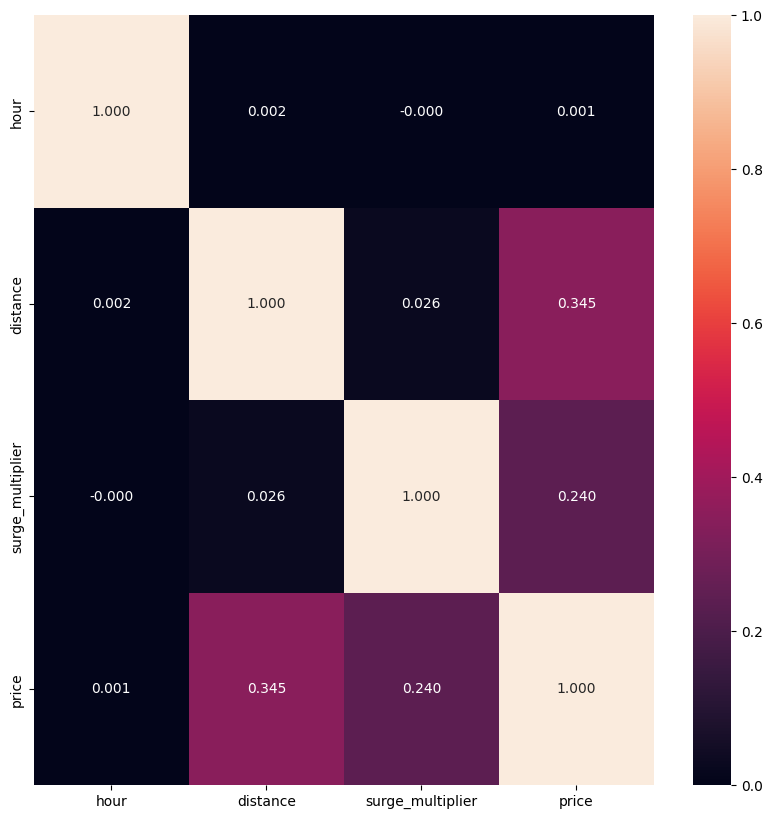

In [23]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".3f")
plt.show()

## Kesimpulan data corelation matrix :
1. Variabel  yang memiliki korelasi terkuat dengan price adalah distance dan surge_multiplier.
2. Variabel  yang memiliki korelasi terkuat dengan surge_multiplier adalah price
3. Variabel  yang memiliki korelasi kuat dengan hour adalah distance 
4. Variabel  yang memiliki korelasi terkuat dengan distance adalah price

## 5.2 visualisasi data using barplot

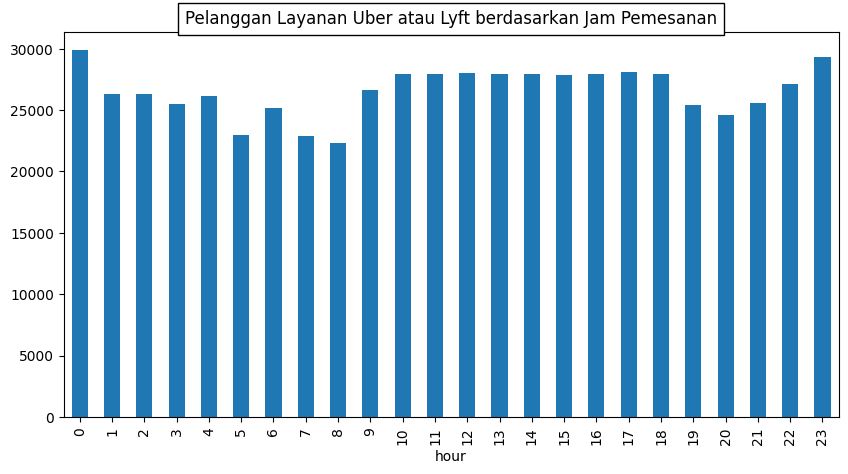

In [24]:
grouped1 = data[['hour']].groupby(['hour']).agg({'hour':'count'})
grouped1.plot(kind='bar', legend=False, figsize=(10,5))

#customize plot
plt.title("Pelanggan Layanan Uber atau Lyft berdasarkan Jam Pemesanan", bbox={'facecolor':'1', 'pad':5})

#menampilkan plot
plt.show()

dari visualisasi barplot diatas dapat disimpulkan bahwa penggunaan layanan transportasi Uber dan Lyft setiap jamnya banyak beroperasi pada pukul 23.00 dan pukul 00.00 dan jam operasi layanan transportasi paling dikit/ rendah customer terjadi pada pukul 08.00.

## 5.3 piechart

In [25]:
data_pie = df[['hour','name','cab_type','destination','source','distance','surge_multiplier','price']]
data_pie

hour          name cab_type    destination            source  \
0          9        Shared     Lyft  North Station  Haymarket Square   
1          2           Lux     Lyft  North Station  Haymarket Square   
2          1          Lyft     Lyft  North Station  Haymarket Square   
3          4  Lux Black XL     Lyft  North Station  Haymarket Square   
4          3       Lyft XL     Lyft  North Station  Haymarket Square   
...      ...           ...      ...            ...               ...   
693065    23           WAV     Uber      North End          West End   
693066    23        UberXL     Uber      North End          West End   
693067    23         UberX     Uber      North End          West End   
693069    23     Black SUV     Uber      North End          West End   
693070    23      UberPool     Uber      North End          West End   

        distance  surge_multiplier  price  
0           0.44              1.00   5.00  
1           0.44              1.00  11.00  
2           0.44              1.00   7.00  
3           0.44              1.00  26.00  
4           0.44              1.00   9.00  
...          ...               ...    ...  
693065      1.00              1.00   9.50  
693066      1.00              1.00  13.00  
693067      1.00              1.00   9.50  
693069      1.00              1.00  27.00  
693070      1.00              1.00  10.00  

[637976 rows x 8 columns]

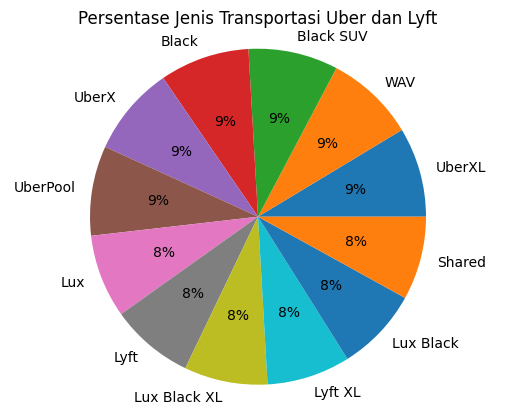

In [26]:
# Hitung jumlah penggunaan jenis transportsi Uber dan Lyft yang digunakan
Jenis_counts = data_pie['name'].value_counts()

# Mencari jumlah penggunaan jenis transportsi Uber dan Lyft yang digunakan
jumlah_terkecil = Jenis_counts.min()
jumlah_terbanyak = Jenis_counts.max()

plt.pie(Jenis_counts, labels=Jenis_counts.index, autopct='%.0f%%')
plt.title('Persentase Jenis Transportasi Uber dan Lyft')

# Membuat lingkaran berbentuk sempurna
plt.axis('equal')  

#menampilkan plot
plt.show()

In [27]:
analisa1 = data_pie.groupby(['name']).agg(Count=('name','count'), Price=('price','mean')).reset_index().sort_values(by='Price', ascending=False)
analisa1

name  Count  Price
4   Lux Black XL  51235  32.32
1      Black SUV  55096  30.29
3      Lux Black  51235  23.06
0          Black  55095  20.52
2            Lux  51235  17.77
10        UberXL  55096  15.68
6        Lyft XL  51235  15.31
9          UberX  55094   9.77
11           WAV  55096   9.77
5           Lyft  51235   9.61
8       UberPool  55091   8.75
7         Shared  51233   6.03

dari analisa1 diatas dapat disimpulkan bahwa penggunaan jenis Uber dan Lyft yang paling sering digunakan adalah Lux Black XL dengan harga 32.32 pada jarak tertentu, dan yang paling sedikit digunakan adalah jenis Shared dengan harga 6.03 pada jarak tertentu.

In [28]:
data_pie['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [29]:
data_pie['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

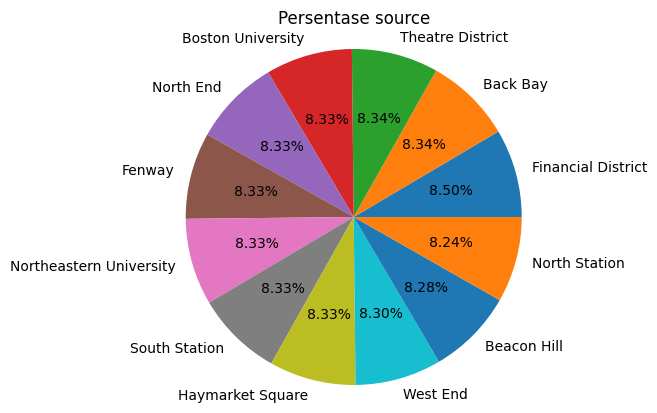

In [30]:
 # Hitung jumlah yang source
source_counts = data_pie['source'].value_counts()

plt.pie(source_counts, labels=source_counts.index, autopct='%1.2f%%')
plt.title('Persentase source')

# Membuat lingkaran berbentuk sempurna
plt.axis('equal')  

#menampilkan plot
plt.show()

In [31]:
analisa2= data_pie.groupby(['source']).agg(Count=('name','count'), Price=('price','mean')).reset_index().sort_values(by='Price', ascending=False)
analisa2

source  Count  Price
2         Boston University  53172  18.85
3                    Fenway  53166  18.38
4        Financial District  54197  18.18
8   Northeastern University  53164  17.90
10         Theatre District  53201  16.60
7             North Station  52576  16.36
11                 West End  52980  16.11
0                  Back Bay  53201  16.05
9             South Station  53160  15.67
1               Beacon Hill  52841  15.66
6                 North End  53171  15.15
5          Haymarket Square  53147  13.58

dari data dan piechart analisa2 dapat disimpulkan bahwa sumber dan tujuan yang sering menggunakan layanan Uberdan lyft adalah Boston University dengan tarif mencapai 18.85.

## 6. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model

## 6.1 Encoding

In [32]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
object_columns

['source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary']

In [33]:
df[object_columns].nunique()

source           12
destination      12
cab_type          2
product_id       12
name             12
short_summary     9
dtype: int64

In [34]:
encoded_df = df[object_columns]
not_encoded_df = df[numeric_columns]

In [35]:
df.to_pickle('df.pkl')

In [36]:
encoded_df = pd.get_dummies(encoded_df).astype('int')
df = pd.concat([not_encoded_df, encoded_df], axis = 1)
df.sample(3)

hour  day  month  price  distance  surge_multiplier  temperature  \
297265     3   13     12  10.50      0.55              1.00        23.26   
280554     0   27     11  16.50      3.01              1.00        44.52   
421247    21   13     12  20.50      3.64              1.00        32.60   

        precipIntensity  precipProbability  humidity  windSpeed  windGust  \
297265             0.00               0.00      0.44       3.78      3.78   
280554             0.11               1.00      0.91       8.33      8.40   
421247             0.00               0.00      0.58       1.87      3.49   

        visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  \
297265       10.00      4.39   1027.17          340        0.00        0   
280554        3.79     42.17   1006.47           89        1.00        0   
421247       10.00     19.30   1034.39          130        0.71        0   

        visibility.1  ozone  precipIntensityMax  source_Back Bay  \
297265         10.00 328.50                0.00                0   
280554          3.79 296.40                0.12                0   
421247         10.00 328.90                0.00                0   

        source_Beacon Hill  source_Boston University  source_Fenway  \
297265                   0                         0              0   
280554                   0                         1              0   
421247                   0                         0              1   

        source_Financial District  source_Haymarket Square  source_North End  \
297265                          0                        0                 0   
280554                          0                        0                 0   
421247                          0                        0                 0   

        source_North Station  source_Northeastern University  \
297265                     0                               0   
280554                     0                               0   
421247                     0                               0   

        source_South Station  source_Theatre District  source_West End  \
297265                     0                        1                0   
280554                     0                        0                0   
421247                     0                        0                0   

        destination_Back Bay  destination_Beacon Hill  \
297265                     0                        0   
280554                     0                        0   
421247                     0                        0   

        destination_Boston University  destination_Fenway  \
297265                              0                   0   
280554                              0                   0   
421247                              0                   0   

        destination_Financial District  destination_Haymarket Square  \
297265                               0                             0   
280554                               0                             0   
421247                               1                             0   

        destination_North End  destination_North Station  \
297265                      0                          0   
280554                      0                          0   
421247                      0                          0   

        destination_Northeastern University  destination_South Station  \
297265                                    0                          1   
280554                                    0                          0   
421247                                    0                          0   

        destination_Theatre District  destination_West End  cab_type_Lyft  \
297265                             0                     0              0   
280554                             1                     0              1   
421247                             0                     0              0   

        cab_type_Uber  product_id_55c66225-fbe

## 6.2 Normalization

In [37]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on your data and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for easier analysis (optional)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [38]:
scaled_df.head()

hour   day  month  price  distance  surge_multiplier  temperature  \
0 -0.25 -0.07   0.00  -0.63     -1.04              0.00         0.26   
1 -0.83  0.67  -1.00  -0.19     -1.04              0.00         0.43   
2 -0.92  0.73  -1.00  -0.48     -1.04              0.00        -0.30   
3 -0.67  0.87  -1.00   0.93     -1.04              0.00        -0.86   
4 -0.75  0.80  -1.00  -0.33     -1.04              0.00        -0.43   

   precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0             0.00               0.00     -0.12       0.55      0.21   
1             0.13               1.00      0.96       1.21      0.58   
2             0.00               0.00      0.17       0.28     -0.03   
3             0.00               0.00      0.08      -0.13     -0.30   
4             0.00               0.00     -0.04       0.65      0.21   

   visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  \
0        0.08      0.19      0.58        -1.12       -0.16     0.00   
1       -3.26      1.05     -0.24        -0.94        0.29     0.00   
2        0.08      0.04     -0.77        -0.10       -1.25     0.00   
3        0.08     -0.38      0.20         0.29       -1.30     0.00   
4        0.08     -0.20     -0.49         0.25       -0.60     0.00   

   visibility.1  ozone  precipIntensityMax  source_Back Bay  \
0          0.08  -0.09                1.39             0.00   
1         -3.26  -0.40                1.41             0.00   
2          0.08   0.20                1.16             0.00   
3          0.08  -0.40               -0.00             0.00   
4          0.08   0.99               -0.00             0.00   

   source_Beacon Hill  source_Boston University  source_Fenway  \
0                0.00                      0.00           0.00   
1                0.00                      0.00           0.00   
2                0.00                      0.00           0.00   
3                0.00                      0.00           0.00   
4                0.00                      0.00           0.00   

   source_Financial District  source_Haymarket Square  source_North End  \
0                       0.00                     1.00              0.00   
1                       0.00                     1.00              0.00   
2                       0.00                     1.00              0.00   
3                       0.00                     1.00              0.00   
4                       0.00                     1.00              0.00   

   source_North Station  source_Northeastern University  source_South Station  \
0                  0.00                            0.00                  0.00   
1                  0.00                            0.00                  0.00   
2                  0.00                            0.00                  0.00   
3                  0.00                            0.00                  0.00   
4                  0.00                            0.00                  0.00   

   source_Theatre District  source_West End  destination_Back Bay  \
0                     0.00             0.00                  0.00   
1                     0.00             0.00                  0.00   
2                     0.00             0.00                  0.00   
3                     0.00             0.00                  0.00   
4                     0.00             0.00                  0.00   

   destination_Beacon Hill  destination_Boston University  destination_Fenway  \
0                     0.00                           0.00                0.00   
1                     0.00                           0.00                0.00   
2                     0.00                           0.00                0.00   
3                     0.00                           0.00                0.00   
4                     0.00                           0.00                0.00   

   destination_Financial District  destination_Haymarket Square  \
0                          

In [39]:
X = scaled_df.drop(columns='price')
y = scaled_df['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 7 Pendefinisian Model

In [41]:
lr = LinearRegression()
lr

LinearRegression()

# 8 Pelatihan Model

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

# 9 Evaluasi Model

In [43]:
y_pred = lr.predict(X_test)

In [44]:
mean_squared_error(y_test, y_pred)

0.03448931246752231

In [45]:
r_sq_train = lr.score(X_train,y_train)
print('Coefficient of determination training data:',r_sq_train)
r_sq_test = lr.score(X_test,y_test)
print('Coefficient of determination testing data:',r_sq_test)
print('Intercept:',lr.intercept_)
print('Slope:',lr.coef_)

Coefficient of determination training data: 0.9288196369467476
Coefficient of determination testing data: 0.9279647865041412
Intercept: 83247676944.76663
Slope: [-2.38315834e-04 -5.34585879e-04  2.97344959e-04  3.54040578e-01
  1.36646836e+00 -2.25985473e-03 -1.40641333e-02 -6.04622703e-03
 -4.02166063e-03 -3.18438912e-03  2.37830281e-03  1.52126048e+10
  3.73115580e-03 -1.27353131e-03  6.43473717e-05 -8.18954658e-03
 -4.69805597e-04 -1.52126048e+10  1.10246953e-05  8.29961437e-04
  3.88208445e+10  3.88208445e+10  5.55636588e+09  5.55636588e+09
  3.88208445e+10  5.55636588e+09  5.55636588e+09  3.88208445e+10
  5.55636588e+09  5.55636588e+09  3.88208445e+10  3.88208445e+10
  7.36539610e+09  7.36539610e+09 -2.58990825e+10 -2.58990825e+10
  7.36539610e+09 -2.58990825e+10 -2.58990825e+10  7.36539610e+09
 -2.58990825e+10 -2.58990825e+10  7.36539610e+09  7.36539610e+09
 -1.63446950e+10  2.22184796e+10  5.81398876e+10 -1.45445032e+10
  2.97115490e+10 -1.12383927e+10 -3.80643843e+11 -2.7554106

Dari output penilaian diatas diperoleh keakuratan data training bernilai 92.08% kemudian tingkat keakuratan dari testing data bernilai 92.19%.Dapat dilihat bahwasannya besarnya nilai testing data ini dapat dinyatakan sebagai overfitting karena overfitting merupakan kondisi di mana model pembelajaran mesin terlalu "memahami" atau menyesuaikan diri dengan data pelatihan secara berlebihan, sehingga kinerjanya menjadi buruk saat diuji dengan data yang belum pernah dilihat sebelumnya (data uji).Meskipun, selisih dari akurasi tidak terlalu signifikan.

# 10 Model Inference

In [46]:
X_train.sample()

hour   day  month  distance  surge_multiplier  temperature  \
295059 -0.08 -0.07   0.00     -0.67              0.00        -0.05   

        precipIntensity  precipProbability  humidity  windSpeed  windGust  \
295059             0.00               0.00      0.13       0.00      0.03   

        visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  \
295059        0.08      0.17      0.61        -1.10        0.29     0.00   

        visibility.1  ozone  precipIntensityMax  source_Back Bay  \
295059          0.08   0.20                1.37             0.00   

        source_Beacon Hill  source_Boston University  source_Fenway  \
295059                0.00                      0.00           0.00   

        source_Financial District  source_Haymarket Square  source_North End  \
295059                       0.00                     0.00              1.00   

        source_North Station  source_Northeastern University  \
295059                  0.00                            0.00   

        source_South Station  source_Theatre District  source_West End  \
295059                  0.00                     0.00             0.00   

        destination_Back Bay  destination_Beacon Hill  \
295059                  0.00                     0.00   

        destination_Boston University  destination_Fenway  \
295059                           0.00                0.00   

        destination_Financial District  destination_Haymarket Square  \
295059                            1.00                          0.00   

        destination_North End  destination_North Station  \
295059                   0.00                       0.00   

        destination_Northeastern University  destination_South Station  \
295059                                 0.00                       0.00   

        destination_Theatre District  destination_West End  cab_type_Lyft  \
295059                          0.00                  0.00           0.00   

        cab_type_Uber  product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e  \
295059           0.00                                             0.00   

        product_id_6c84fd89-3f11-4782-9b50-97c468b19529  \
295059                                             0.00   

        product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546  \
295059                                             0.00   

        product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969  \
295059                                             0.00   

        product_id_997acbb5-e102-41e1-b155-9df7de0a73f2  \
295059                                             1.00   

        product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d  product_id_lyft  \
295059                                             0.00             0.00   

        product_id_lyft_line  product_id_lyft_lux  product_id_lyft_luxsuv  \
295059                  0.00                 0.00                    0.00   

        product_id_lyft_plus  product_id_lyft_premier  name_Black  \
295059                  0.00                     0.00        0.00   

        name_Black SUV  name_Lux  name_Lux Black  name_Lux Black XL  \
295059            0.00      0.00            0.00               0.00   

        name_Lyft  name_Lyft XL  name_Shared  name_UberPool  name_UberX  \
295059       0.00          0.00         0.00           1.00        0.00   

        name_UberXL  name_WAV  short_summary_ Clear   short_summary_ Drizzle   \
295059         0.00      0.00                   0.00                     0.00   

        short_summary_ Foggy   short_summary_ Light Rain   \
295059                   0.00                        0.00   

        short_summary_ Mostly Cloudy   short_summary_ Overcast   \
295059                           0.00                      1.00   

        short_summary_ Partly Cloudy   short_summary_ Possible Drizzle   \
295059                           0.00                              0.00   

        short_summary_ Rain   
295059                  0.00

In [47]:
# mencari probability distribution pada kolom price
X_new = df['price']
mean = statistics.mean(X_new)
std_dev = statistics.stdev(X_new)

# Menghitung distribusi probabilitas untuk setiap nilai dalam X_new
probabilities = stats.norm.pdf(X_new, mean, std_dev)

print("Probabilities:", probabilities)


Probabilities: [0.01987885 0.03585048 0.02533609 ... 0.03216086 0.022819   0.03344251]


In [48]:
# mencari confidence intervals
X_new = df['price']
# Menghitung mean dan standard deviation
mean_value = np.mean(X_new)
std_dev = np.std(X_new, ddof=1)  # ddof=1 untuk menggunakan sample standard deviation

# Menghitung confidence interval dengan tingkat kepercayaan 95%
confidence_interval = stats.t.interval(0.95, len(X_new) - 1, loc=mean_value, scale=stats.sem(X_new))

print("Mean:", mean_value)
print("Confidence Interval (95%):", confidence_interval)


Mean: 16.545125490614065
Confidence Interval (95%): (16.5222449800685, 16.56800600115963)


# mencari Hypothesis Testing

In [49]:
p_value = normal_ad(df['price'])
p_value

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\_adnorm.py:67: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


(inf, 0.0)

$Ho$ ditolak karena p-value lebih kecil dari 0.05. Maka dari itu distribusi dari harga Uber dan Lyft tidak terdistribuse secara normal.

## 11. Kesimpulan

In [50]:
lr.coef_

array([-2.38315834e-04, -5.34585879e-04,  2.97344959e-04,  3.54040578e-01,
        1.36646836e+00, -2.25985473e-03, -1.40641333e-02, -6.04622703e-03,
       -4.02166063e-03, -3.18438912e-03,  2.37830281e-03,  1.52126048e+10,
        3.73115580e-03, -1.27353131e-03,  6.43473717e-05, -8.18954658e-03,
       -4.69805597e-04, -1.52126048e+10,  1.10246953e-05,  8.29961437e-04,
        3.88208445e+10,  3.88208445e+10,  5.55636588e+09,  5.55636588e+09,
        3.88208445e+10,  5.55636588e+09,  5.55636588e+09,  3.88208445e+10,
        5.55636588e+09,  5.55636588e+09,  3.88208445e+10,  3.88208445e+10,
        7.36539610e+09,  7.36539610e+09, -2.58990825e+10, -2.58990825e+10,
        7.36539610e+09, -2.58990825e+10, -2.58990825e+10,  7.36539610e+09,
       -2.58990825e+10, -2.58990825e+10,  7.36539610e+09,  7.36539610e+09,
       -1.63446950e+10,  2.22184796e+10,  5.81398876e+10, -1.45445032e+10,
        2.97115490e+10, -1.12383927e+10, -3.80643843e+11, -2.75541069e+10,
       -4.49319157e+10, -

Dari output penilaian diatas diperoleh keakuratan data training bernilai 92.08% kemudian tingkat keakuratan dari testing data bernilai 92.19%.Dapat dilihat bahwasannya besarnya nilai testing data ini dapat dinyatakan sebagai overfitting karena overfitting merupakan kondisi di mana model pembelajaran mesin terlalu "memahami" atau menyesuaikan diri dengan data pelatihan secara berlebihan, sehingga kinerjanya menjadi buruk saat diuji dengan data yang belum pernah dilihat sebelumnya (data uji).Meskipun, selisih dari akurasi tidak terlalu signifikan.

In [51]:
lr.intercept_

83247676944.76663

adanya intercept, kita bisa lebih memahami dan menginterpretasikan bagaimana variabel dependen bereaksi terhadap variasi dalam variabel independen. Dari hasil analisis kami, kami mendapatkan nilai intercept dengan hasil -208827576133.78488